In [17]:
import os
from coffea.nanoevents import NanoEventsFactory
from coffea import processor

import dask_awkward as dak
import hist.dask as hda

import warnings
warnings.filterwarnings("error", module="coffea.*")


use_taskvine = True

if use_taskvine:
    from ndcctools.taskvine import DaskVine

    vine_manager = DaskVine(
        [9123, 9128],
        name=f"{os.environ.get("VINE_MANAGER_NAME")}",
    )

    executor_args = {
        "scheduler": vine_manager,
        "worker_transfers": True,
        # "task_mode": "function-calls",
    }
else:
    from distributed import Client
    client = Client()

    executor_args = {}

Output()

{'from-uproot-9e9b312166322faefaf9bb08890cffef': frozenset({'MET_pt'})}

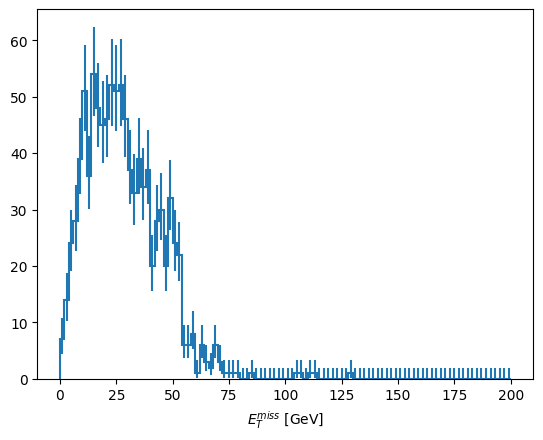

In [19]:
data_abs_path = os.path.abspath("data/small_data.root")
data_url = f"file://{data_abs_path}"

data_file = (data_url,)

from coffea.nanoevents.schemas import NanoAODSchema


NanoAODSchema.warn_missing_crossrefs = False


events = NanoEventsFactory.from_root(
    {data_file: "/Events"},
    metadata={"dataset": "SingleMu"}
).events()

q1_hist = (
    hda.Hist.new.Reg(100, 0, 200, name="met", label="$E_{T}^{miss}$ [GeV]")
    .Double()
    .fill(events.MET.pt)
)

q1_hist.compute(**executor_args).plot1d()

dak.necessary_columns(q1_hist)